<a href="https://www.kaggle.com/code/eavprog/abscur-par-hist?scriptVersionId=125411328" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Графики истории парных валютных курсов


# Оглавление проекта "Абсолютный валютный курс" 

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/u/262921-aleksey-enin)

## Абсолютные валютные курсы:
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# AUDHKD

Графики истории парного курса для валютной пары AUDHKD ([Австралийский доллар](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%81%D1%82%D1%80%D0%B0%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80) / [Гонконгский доллар](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BD%D0%BA%D0%BE%D0%BD%D0%B3%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80))

## За месяц

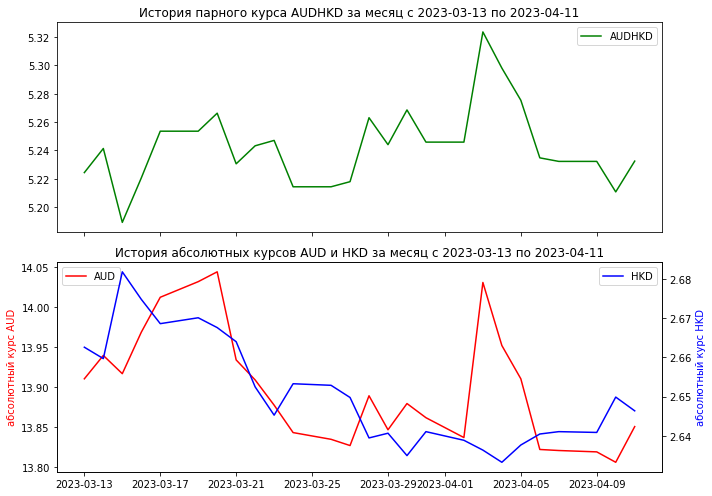

## За квартал

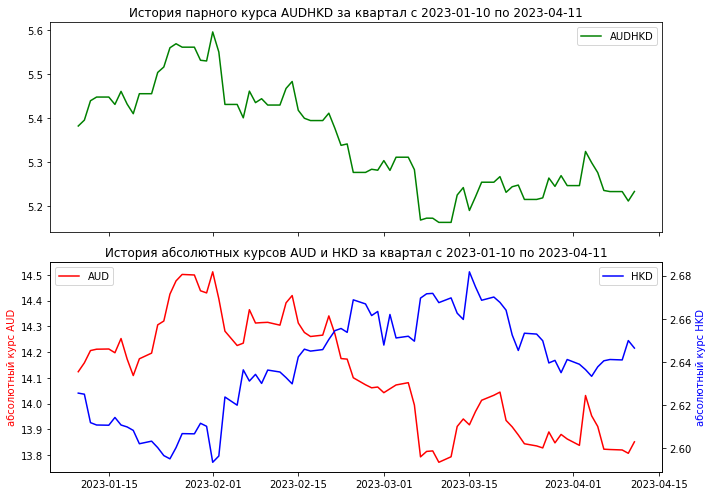

## За полгода

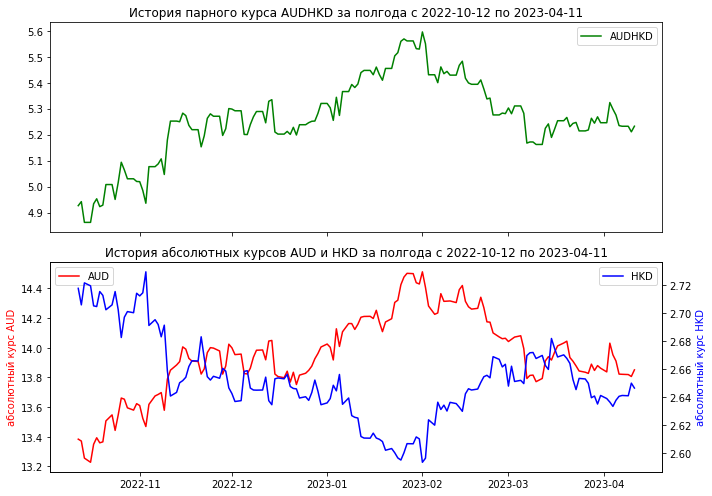

## За год

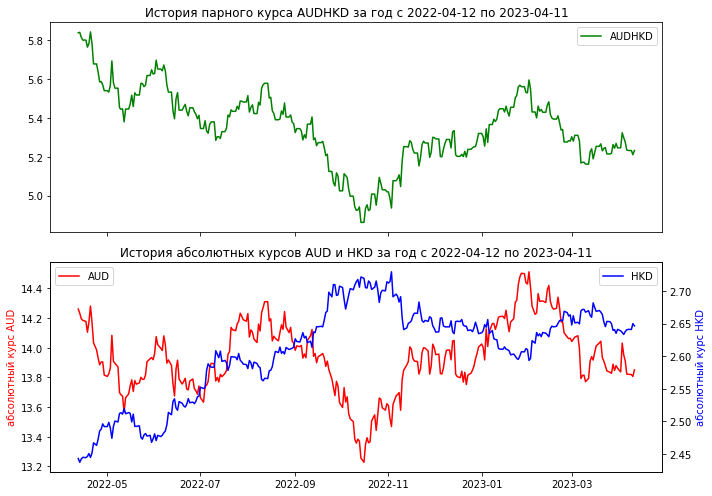

## За 2 года

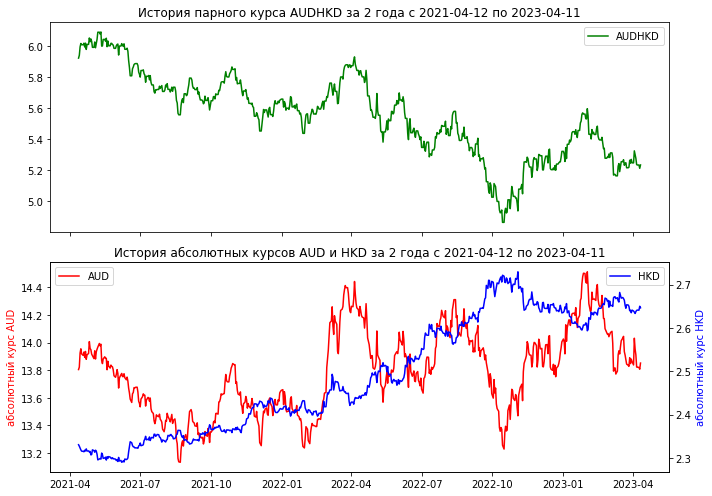

## За 3 года

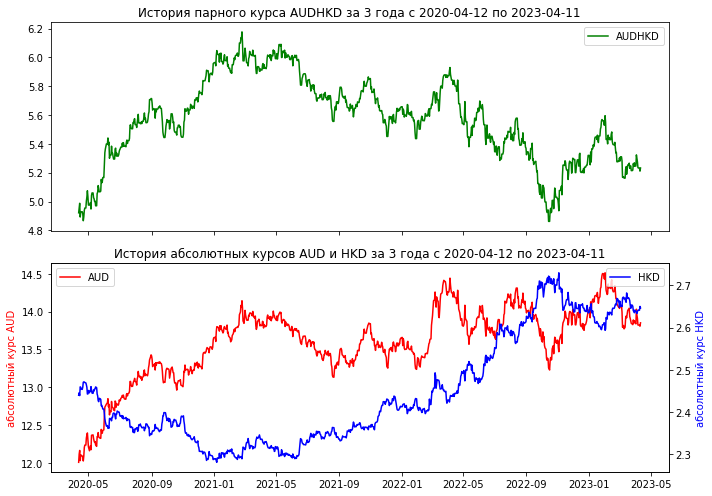

## За 5 лет

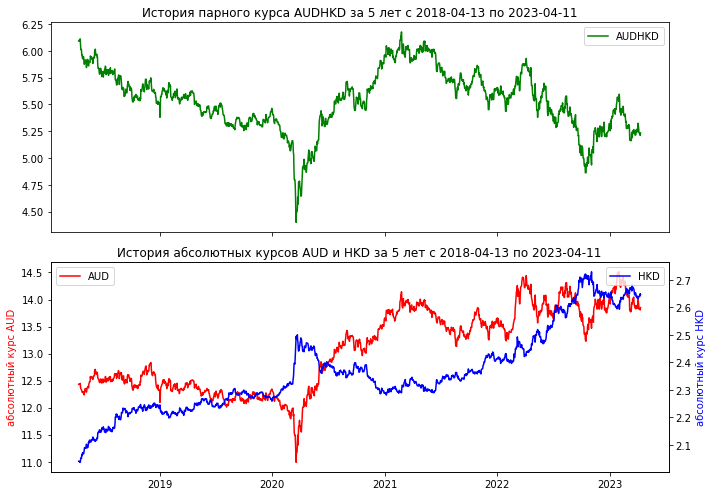

---

In [1]:
import numpy as np
import pandas as pd
import datetime
import abscur_menu
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import abscur_post as ap

# меню проекта печатаем
abscur_menu.print_menu()

abscur = pd.read_csv("/kaggle/input/abscur-data/abscur.csv",index_col=0,parse_dates=['Date'])
parcur = pd.read_csv("/kaggle/input/abscur-data/parcur.csv",index_col=0,parse_dates=['Date'])
ras_cur = pd.read_csv("/kaggle/input/abscur-data/cur_ras.csv",index_col=0)

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

pars = list(parcur.columns)
pars.sort()

cnt = 0

for par in pars:
    display(Markdown("# " + par))
    
    display(Markdown("Графики истории парного курса для валютной пары " + par + " ([" + ras_cur.loc[par[:3]][0] + "](" + ras_cur.loc[par[:3]][1] + ") / [" + ras_cur.loc[par[3:]][0] + "](" + ras_cur.loc[par[3:]][1] + "))"))
    
    for per,title_per in diap:
        display(Markdown("## За "+title_per))
        
        
        date_start = abscur.asfreq(freq="D").index[-per]
        date_finish = abscur.index[-1]

        res_abs_1 = abscur[abscur.index >= date_start][par[:3]]
        res_abs_2 = abscur[abscur.index >= date_start][par[3:]]
        res_par = parcur[parcur.index >= date_start][par]
        
        fig = plt.figure(figsize=(10,7))
        
        ax = fig.subplots(2,1,sharex=True)
        
        ax[0].plot(res_par,color = 'green', label = par)
        ax[0].legend()
        
        text = "История парного курса " + par + " за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по " + datetime.datetime.strftime(date_finish,"%Y-%m-%d")
        ax[0].set_title(text)
        
        ax[1].set_ylabel('абсолютный курс ' + par[:3], color = 'red') 
        ax[1].plot(res_abs_1, color = 'red',label = par[:3]) 
        ax[1].legend(loc=2)

        ax2 = ax[1].twinx()
        ax2.set_ylabel('абсолютный курс ' + par[3:],color = 'blue')
        ax2.plot(res_abs_2,color = 'blue',label= par[3:])
        ax2.legend(loc=1)
        
        text = "История абсолютных курсов " + par[:3] + " и " + par[3:] + " за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по " + datetime.datetime.strftime(date_finish,"%Y-%m-%d")
        plt.title(text)
        fig.tight_layout()
        
        plt.savefig(str(cnt) + ".png")
        cnt += 1
        
        plt.show()

        
#         break
        
    display(Markdown("---"))
    break


num = np.random.randint(cnt)
ap.send_img_and_text(str(num) + ".png","Графики истории парных валютных курсов и абсолютные курсы составляющих валют\n---\nИсточник - https://www.kaggle.com/eavprog/abscur-par-hist")